<center><h1 style="color:#888484">DATA EXPLORATION & EXPLORATORY DATA ANALYSIS</h1></center>

<div class="jumbotron">Data analysis is a process of <span style="color:blue">inspecting</span>, <span style="color:blue">cleansing</span>, <span style="color:blue">transforming</span>, and <span style="color:blue">modeling</span> data with the goal of discovering <span style="color:blue">useful information</span>, <span style="color:blue">informing conclusions</span>, and supporting <span style="color:blue">decision-making</span>.</div>

<div class="jumbotron">Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover <span style="color:blue">patterns</span>,to spot <span style="color:blue">anomalies</span>,to test <span style="color:blue">hypothesis</span> and to check <span style="color:blue">assumptions</span> with the help of summary statistics and graphical representations.</div>

<h4 style="color:blue">Import all the important libraries</h4>



In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math


<h4 style="color:blue">Read titanic.csv</h4>

In [39]:
df = pd.read_csv('Titanic.csv')

<h4 style="color:blue">Prints first n rows of the DataFrame and Similarly “.tail()” returns last five observations of the data set.</h4>

In [40]:
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h4 style="color:blue">Find out the total number of rows and columns in the data set using “.shape”.
</h4>

In [41]:
df.shape

(891, 12)

<div class="alert alert-info"><strong>Info !</strong> 

Dataset comprises of 891 observations and 12 characteristics.

Out of which one is dependent variable and rest 11 are independent variables.</div>



In [42]:
df.columns.values 

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<h4 style="color:blue">Get information about Index, Datatype and Memory information</h4>

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


 <div class="alert alert-info"><strong>Info !</strong>
 Age and Cabin column have some missing/Null values,which have to be replace by mean or removed.</div>

<h4 style="color:blue">Get Summary statistics for numerical columns</h4>

In [44]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h4 style="color:blue">Views unique values and counts {df.s.value_counts(dropna=False)}/{df.s.unique(dropna=False)}</h4>

In [45]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<div class="alert alert-info">
  <strong>Info!</strong><br> Total number of Passengers who survived = 342<br>
    Total number of Passengers who died = 549
</div>

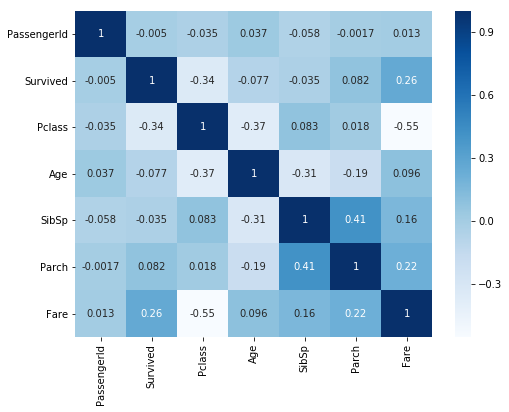

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

<div class="alert alert-info"><strong>Info !</strong><br> Dark shades represents positive correlation while lighter shades represents negative correlation.<br>
Here we can observe that Feature Parch and Sibsp have highly multicollinearity with value of 0.41.
</div>

<h4 style="color:blue">Bar plot of Titanic survival</h4>

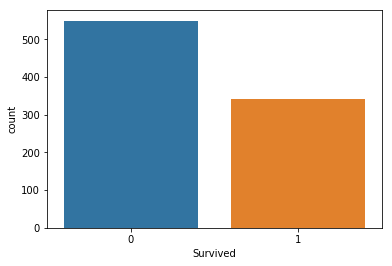

In [47]:
sns.countplot(x='Survived', data=df);

<div class="alert alert-info"><strong>info !</strong><br>
This Bar plot graph is showing the total number of survival and non-survival
</div>

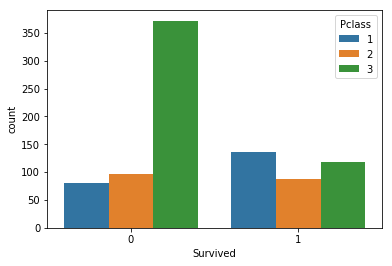

In [48]:
sns.countplot(x='Survived', hue="Pclass" , data=df);

<div class="alert alert-info"><strong>Info !</strong><br>
Showing Different PClass with values
</div>

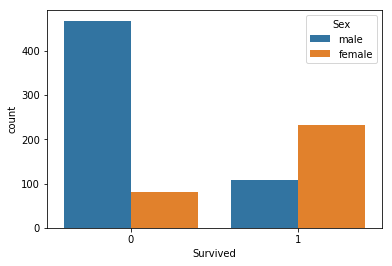

In [49]:
sns.countplot(x='Survived', hue="Sex", data=df);

<div class="alert alert-info"><strong>Info !</strong><br>
Showing Total number of Male and Female Passengers in Titanic
</div>

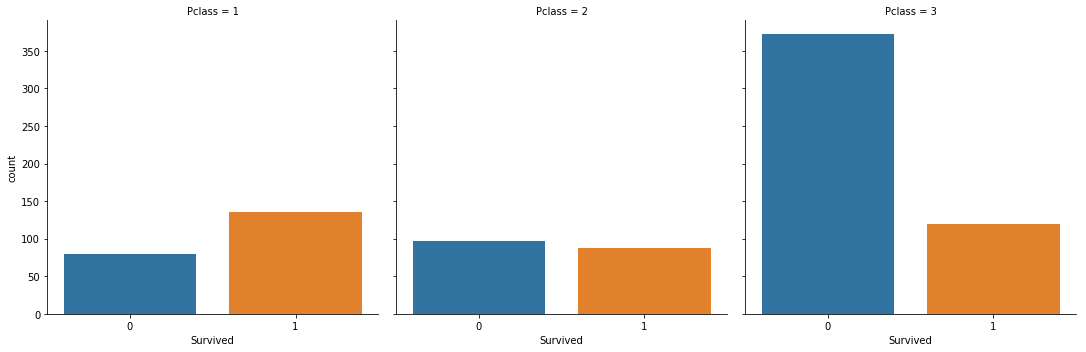

In [50]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df);

<div class="alert alert-info"><strong>Info !</strong><br>
Showing Total number of Passengers survived(1) in different PClass
</div>

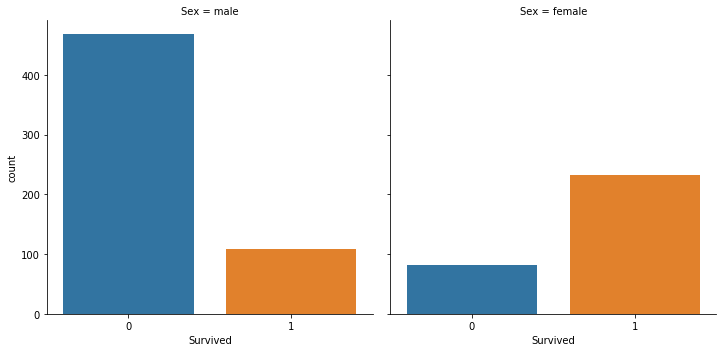

In [51]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df);

<div class="alert alert-info"><strong>Info !</strong><br>
Sex wise total number of passengers survived
</div>

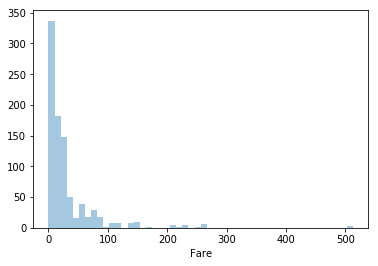

In [52]:
sns.distplot(df.Fare, kde=False);

<div class="alert alert-info"><strong>Info !</strong><br>
Most passengers paid less than 100 for travelling with the Titanic.
</div>